## Midterm 1 - Connor Johnson

In [13]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import root
from scipy.misc import derivative
from scipy.signal import argrelextrema
import math
from math import exp
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
%config InlineBackend.figure_format = 'png'
from matplotlib import pyplot as plt

from itertools import product

plt.rcParams["font.family"]='Times New Roman'
plt.rcParams["mathtext.fontset"]='stix'
# set fontsize in markdown cells
from IPython.core.display import display, HTML, Math, Latex
display(HTML("<style>.rendered_html { font-size: 12px; }</style>"))

In [2]:
# Phase portrait: streamplot
def PP_2d(x1,x2,y1,y2,f1,f2,ax,nx=100,ny=100,dens=[1,1],lw=1,col='k'):
    ax = ax or plt.gca()
    x = np.linspace(x1,x2,nx)
    y = np.linspace(y1,y2,ny)
    X,Y = np.meshgrid(x,y)
    U = f1(X,Y); V = f2(X,Y)
    ax.streamplot(X,Y,U,V,density=dens,
                 linewidth=lw,color=col,arrowstyle='->')
    return ax

# Phase portrait: nullclines
def PP_nc(x1,x2,y1,y2,f1,f2,ax,nx=100,ny=100,lw=1,c1='m',c2='b'):
    ax = ax or plt.gca()
    x = np.linspace(x1,x2,nx)
    y = np.linspace(y1,y2,ny)
    X,Y = np.meshgrid(x,y)
    U = f1(X,Y); V = f2(X,Y)    
    ax.contour(X,Y,U,[0],colors='m')
    ax.contour(X,Y,V,[0],colors='b')
    return ax   

# Display fixed points
def PP_FPs(FPs,tau,delta,ax, print=False):
    ax = ax or plt.gca()
    for j in np.arange(len(FPs)):
        FP_ = np.array(FPs[j],dtype=float) 
        if tau[j]<0 and delta[j]>0:
            if print:
                print('stable FP: ',FP_)
            ax.plot(FP_[0],FP_[1],'ro',ms=8,mfc='r',mec='r',lw=2)
        else:
            if print:
                print('unstable FP: ',FP_)
            ax.plot(FP_[0],FP_[1],'ro',ms=8,mfc='w',mec='r',lw=2)
    return ax

# Bifurcation diagram: x vs r
def BF_diag(f,x1,x2,r1,r2,nx=80,nr=80,title='',x_lab='$r$'):
    fx = lambda x,r: derivative(f,x,dx=1e-6,args=(r,))
    x=np.linspace(x1,x2,nx)
    r=np.linspace(r1,r2,nr)
    R,X = np.meshgrid(r,x)
    Z = f(X,R)
    Zx= fx(X,R)
    Zu= np.ma.masked_where(Zx<0,Z)
    Zs= np.ma.masked_where(Zx>0,Z)
    fig, ax=plt.subplots()
    ax.contour(R,X,Zs,levels=[0],colors='k',linewidths=3)
    ax.contour(R,X,Zu,levels=[0],colors='k',linewidths=3,linestyles='dashed')
    ax.grid()
    ax.set_xlabel(x_lab)
    ax.set_ylabel('$x^\star$')
    ax.set_title(title,color='b')
    plt.show()   

### Problem 1

#### Part (a)

Solving for the fixed point:<br>
$\dot{x} = 0 \rightarrow sin(y)=0 \rightarrow y=\pi n, n\in \mathbb{Z}$<br>
$\dot{y} =0 \rightarrow x-x^3=0 \rightarrow x(1-x^2)=0 \rightarrow x=0, \pm 1$ <br>
<br><br>
Fixed points at $(0,\pi n)$, $(1, \pi n)$, and $(-1, \pi n)$, $n\in \mathbb{Z}$.

$A=\begin{bmatrix} \partial_x \dot{x} & \partial_y \dot{x} \\ \partial_x \dot{y} & \partial_y \dot{y} \end{bmatrix}$
$=\begin{bmatrix} 0 & cos(y) \\ 1-3x^2 & 0 \end{bmatrix}$
<br>

Classiifying each fixed point:<br>
$(0,\pi n), n$ is even $: A=\begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}, det(A)=0 - (1) = -1$<br>
$\>\>\>\>\>\>\>\>\>\>\>\>$ Since $det(A)<0$, these fixed points are saddle points.<br>
$(0,\pi n), n$ is odd $: A=\begin{bmatrix} 0 & -1 \\ 1 & 0 \end{bmatrix}, det(A)=0 - (-1) = 1, tr(A) = 0$ <br>
$\>\>\>\>\>\>\>\>\>\>\>\>$ Since $det(A)>0$ and $tr(A)=0$ these fixed points are neturally-stable centers.<br>
$(\pm 1,\pi n), n$ is odd $: A=\begin{bmatrix} 0 & -1 \\ -2 & 0 \end{bmatrix}, det(A)=0 - (2) = -2$ <br>
$\>\>\>\>\>\>\>\>\>\>\>\>$ Since $det(A)<0$, these fixed points are saddle points.<br>
$(\pm 1,\pi n), n$ is even $: A=\begin{bmatrix} 0 & 1 \\ -2 & 0 \end{bmatrix}, det(A)=0 - (-2) = 2, tr(A) = 0$ <br>
$\>\>\>\>\>\>\>\>\>\>\>\>$ Since $det(A)>0$ and $tr(A)=0$ these fixed points are neturally-stable centers.<br>

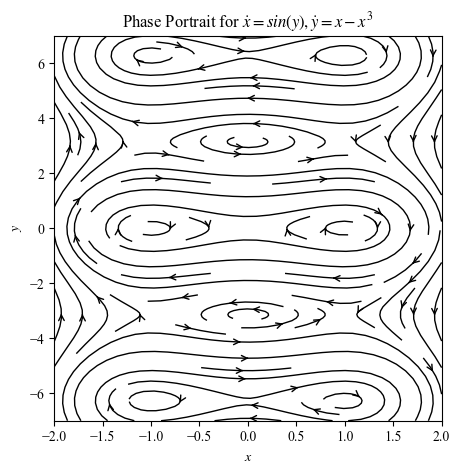

In [3]:
f_x = lambda x,y: np.sin(y)
f_y = lambda x,y: x-x**3

_, ax = plt.subplots(figsize=(5,5))
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_title("Phase Portrait for $\dot{x} = sin(y), \dot{y} = x-x^3$")
ax = PP_2d(-2,2,-7,7, f_x, f_y, ax, nx = 6000, ny = 6000)

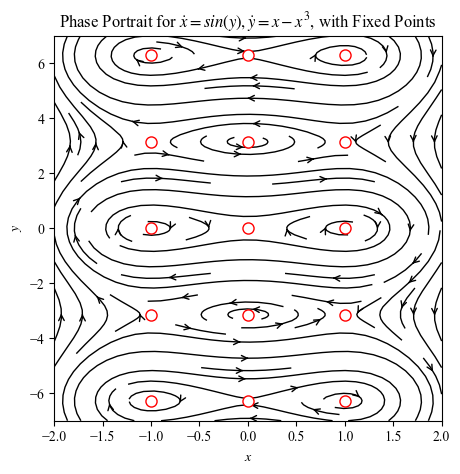

In [4]:

_, ax = plt.subplots(figsize=(5,5))
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_title("Phase Portrait for $\dot{x} = sin(y), \dot{y} = x-x^3$, with Fixed Points")
ax = PP_2d(-2,2,-7,7, f_x, f_y, ax, nx = 6000, ny = 6000)
for n in [-2,-1,0,1,2]:
    tau = [0,0,0]
    delta = [-2,1,-2] if n%2==1 else [2,-1,2]
    ax = PP_FPs([(-1, math.pi *n), (0, math.pi *n),(1, math.pi *n)], delta=delta, tau=tau, ax=ax)

#### Part (b)

Solving for the fixed point:<br>
$\dot{x} = 0 \rightarrow xy-1=0 \rightarrow x=\frac{1}{y}$<br>
$\dot{y} =0 \rightarrow x-y^3=0 \rightarrow y^3=\frac{1}{y} \rightarrow y^2=1 \rightarrow y=\pm 1$ <br>
<br><br>
Fixed points at $(1,1)$, and $(-1,-1)$.

$A=\begin{bmatrix} \partial_x \dot{x} & \partial_y \dot{x} \\ \partial_x \dot{y} & \partial_y \dot{y} \end{bmatrix}$
$=\begin{bmatrix} y & x \\ 1 & -3y^2 \end{bmatrix}$
<br>

Classiifying each fixed point:<br>
$(1,1): A=\begin{bmatrix} 1 & 1 \\ 1 & -3 \end{bmatrix}, det(A)=-3 - (1) = -4$<br>
$\>\>\>\>\>\>\>\>\>\>\>\>$ Since $det(A)<0$, this fixed point is a saddle point.<br>
$(-1,-1): A=\begin{bmatrix} -1 & -1 \\ 1 & -3 \end{bmatrix}, det(A)=3 - (-1) = 4, tr(A) = -4, \Delta = (tr(A))^2-4det(A) = 16-16=0$ <br>
$\>\>\>\>\>\>\>\>\>\>\>\>$ Since $det(A)>0$, $tr(A)<0$, and $\Delta=0$, this fixed point is a degenerate stable node.<br>

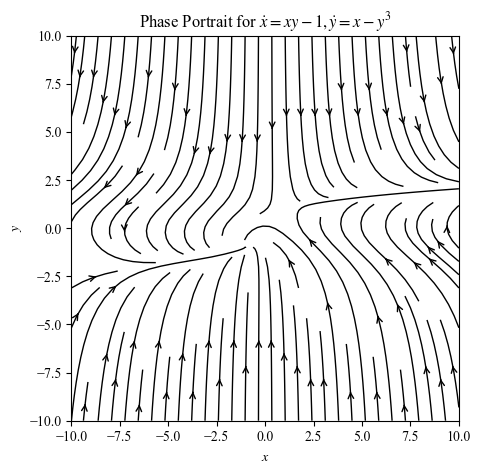

In [5]:
f_x = lambda x,y: x*y-1
f_y = lambda x,y: x-y**3

_, ax = plt.subplots(figsize=(5,5))
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_title("Phase Portrait for $\dot{x} = xy-1, \dot{y} = x-y^3$")
ax = PP_2d(-10,10,-10,10, f_x, f_y, ax, nx = 6000, ny = 6000)
#ax = PP_nc(-7,7,-4,4, f_x, f_y, ax, nx = 2000, ny = 2000)


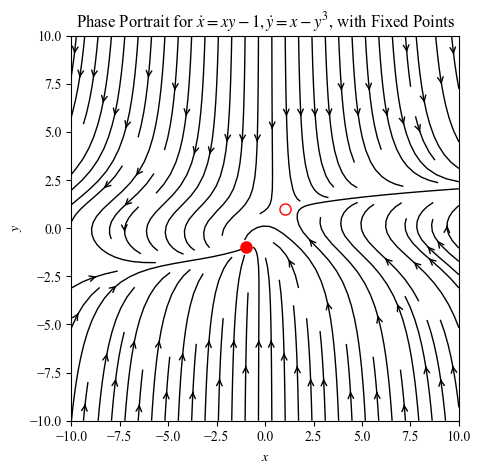

In [6]:
_, ax = plt.subplots(figsize=(5,5))
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_title("Phase Portrait for $\dot{x} = xy-1, \dot{y} = x-y^3$, with Fixed Points")
ax = PP_2d(-10,10,-10,10, f_x, f_y, ax, nx = 6000, ny = 6000)
#ax = PP_nc(-7,7,-4,4, f_x, f_y, ax, nx = 2000, ny = 2000)

tau = [-2, -4]
delta = [-4, 4]
ax = PP_FPs([(1,1), (-1,-1)], delta=delta, tau=tau, ax=ax)

### Problem 2

#### Part (a)

Solving for the fixed point:<br>
$\dot{x} = 0 \rightarrow x^2-y-1=0 \rightarrow y=x^2-1=(x-1)(x+1)$<br>
$\dot{y} =0 \rightarrow y(x-2)=0 \rightarrow 0=(x-1)(x+1)(x-2) \rightarrow x= 2, \pm 1$ <br>
<br><br>
Fixed points at $(1,0)$, $(-1,0)$, and $(2,3)$.

$A=\begin{bmatrix} \partial_x \dot{x} & \partial_y \dot{x} \\ \partial_x \dot{y} & \partial_y \dot{y} \end{bmatrix}$
$=\begin{bmatrix} 2x & -1 \\ y & x-2 \end{bmatrix}$
<br>

Classiifying each fixed point:<br>
$(1,0): A=\begin{bmatrix} 2 & 1 \\ 0 & -1 \end{bmatrix}, det(A)=-2 - 0 = -2$<br>
$\>\>\>\>\>\>\>\>\>\>\>\>$ Since $det(A)<0$, this fixed point is a saddle point.<br>
$(-1,0): A=\begin{bmatrix} -2 & -1 \\ 0 & -3 \end{bmatrix}, det(A)=6-0=6, tr(A) = -5, \Delta = (tr(A))^2-4det(A) = 25-24=1$ <br>
$\>\>\>\>\>\>\>\>\>\>\>\>$ Since $det(A)>0$, $tr(A)<0$, and $\Delta>0$, this fixed point is a stable node.<br>
$(2,3): A=\begin{bmatrix} 4 & -1 \\ 3 & 0 \end{bmatrix}, det(A)=0-(-3)=3, tr(A) = 4, \Delta = (tr(A))^2-4det(A) = 16-12=4$ <br>
$\>\>\>\>\>\>\>\>\>\>\>\>$ Since $det(A)>0$, $tr(A)>0$, and $\Delta>0$, this fixed point is an unstable node.<br>

#### Part (b)

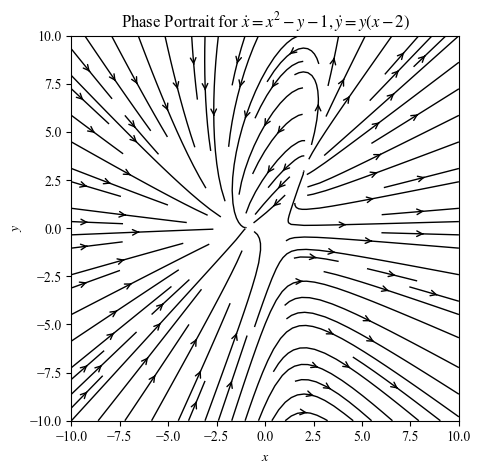

In [7]:
f_x = lambda x,y: x**2-y-1
f_y = lambda x,y: y*(x-2)

_, ax = plt.subplots(figsize=(5,5))
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_title("Phase Portrait for $\dot{x} = x^2-y-1, \dot{y} = y(x-2)$")
ax = PP_2d(-10,10,-10,10, f_x, f_y, ax, nx = 6000, ny = 6000)

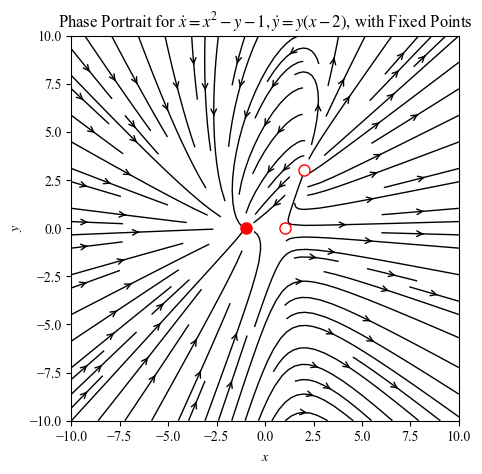

In [8]:
_, ax = plt.subplots(figsize=(5,5))
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_title("Phase Portrait for $\dot{x} = x^2-y-1, \dot{y} = y(x-2)$, with Fixed Points")
ax = PP_2d(-10,10,-10,10, f_x, f_y, ax, nx = 6000, ny = 6000)
#ax = PP_nc(-7,7,-4,4, f_x, f_y, ax, nx = 2000, ny = 2000)

tau = [1, -5, 4]
delta = [-2, 6, 3]
ax = PP_FPs([(1,0),(-1,0),(2,3)], delta=delta, tau=tau, ax=ax)

#### Part (c)

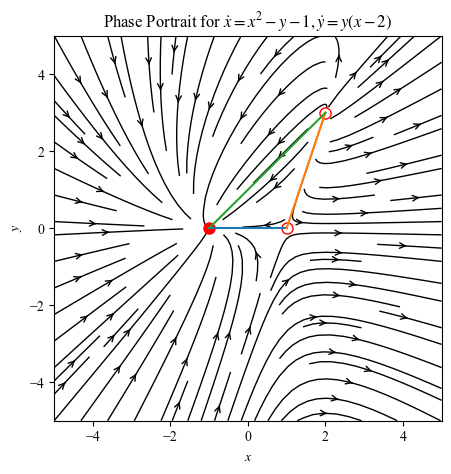

In [9]:
f_x = lambda x,y: x**2-y-1
f_y = lambda x,y: y*(x-2)

_, ax = plt.subplots(figsize=(5,5))
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_title("Phase Portrait for $\dot{x} = x^2-y-1, \dot{y} = y(x-2)$")
ax = PP_2d(-5,5,-5,5, f_x, f_y, ax, nx = 2000, ny = 2000)
#ax = PP_nc(-7,7,-4,4, f_x, f_y, ax, nx = 2000, ny = 2000)

tau = [1, -5, 4]
delta = [-2, 6, 3]
ax = PP_FPs([(1,0),(-1,0),(2,3)], delta=delta, tau=tau, ax=ax)

#y=0
x = np.linspace(-1,1,100)
y = 0.0 * x
plt.plot(x,y, scalex=False, scaley=False)

#y-3=3(x-2)
x = np.linspace(1, 2)
y = 3*(x-2) + 3
plt.plot(x,y)

#y-3 = (x-2)
x = np.linspace(-1,2,200)
y = (x-2) + 3
_ = plt.plot(x,y)


According to Index Theory, if a closed orbit were to exist, it would have to encompass either the stable node or the unstable node, but not both, since that would mean that $I_c>1$. In addition, according to a corollary from the Existness and Uniqueness Theorem, trajectories cannot cross. The blue line in the phase portrait above represents a nullcline where $\dot{y} = 0$ between the stable node and the saddle point. Since that trajectory would cross a closed trajectory that encompasses the stable node, a closed orbit around the stable node cannot exist. A similar argument can be made to conclude that no closed orbits around the unstable node. The green line in the phase portrait above represents straight-line trajectory between the stable and unstable nodes. If a closed trajectory encompasses the unstable node, it would have to pass the green line. Since trajectories cannot cross, that closed trajectory, and therefore closed orbit, cannot exist.

NOTE: Done problem 1 and 2 in a little over an hour

### Problem 3

#### Part (a)

Let $x = g/k_4$, then the equation can be written as<br>
$\dot{g}=k_1 s_o -k_2 k_4 g + \frac{k_3 x^2}{1+x^2}$<br>
$\frac{k_4 \dot{x}}{k_3} = \frac{k_1}{k_3} s_o -\frac{k_2 k_4}{k_3} g + \frac{x^2}{1+x^2}$<br>
<br>
To create $\frac{dx}{d\tau}$, let $\tau = \frac{k_3}{k_4}t$, then 
$\frac{dx}{d\tau} = \dot{x} \frac{dt}{d\tau} = \dot{x}\frac{k_4}{k_3}$ <br>
<br>
This leads to
$\frac{dx}{d\tau} = s - rx + \frac{x^2}{1+x^2}$, where $s=\frac{k_1}{k_3}$ and $r=\frac{k_2 k_4}{k_3}$.

#### Part (b)

When $s=0$, $\frac{dx}{d\tau} = -rx + \frac{x^2}{1+x^2}$<br>
Solving for the fixed points: <br>
$\frac{dx}{d\tau} = 0 \rightarrow 0 = -rx + \frac{x^2}{1+x^2} \rightarrow rx(1+x^2) = x^2 \rightarrow r + rx^2 = x \rightarrow x^2 -\frac{x}{r} + 1 = 0$<br><br>
Fixed points at $x^* = \frac{\frac{1}{r} \pm \sqrt{\frac{1}{r^2} - 4}}{2}$, assuming $r\leq \frac{1}{2}$. Both fixed points are positive.<br>
Also a fixed point at $x^*=0$.

NOTE: Reached here after 2 hours

#### Part (c)

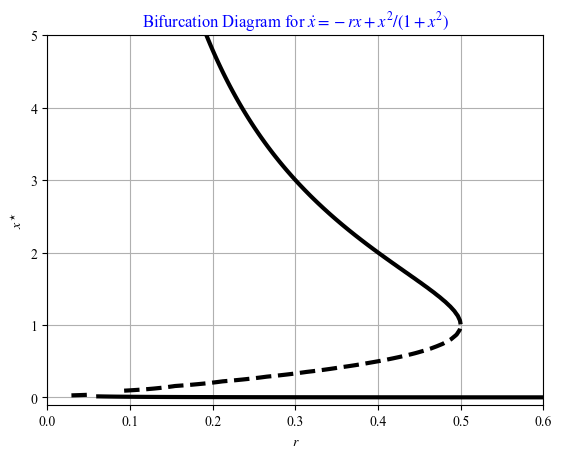

In [10]:
f = lambda x,r: -r*x + (x**2)/(1+x**2)

ax = BF_diag(f, -0.1, 5, 0, 0.6, title="Bifurcation Diagram for $\dot{x} =-rx+x^2/(1+x^2)$")

#### Part (d)

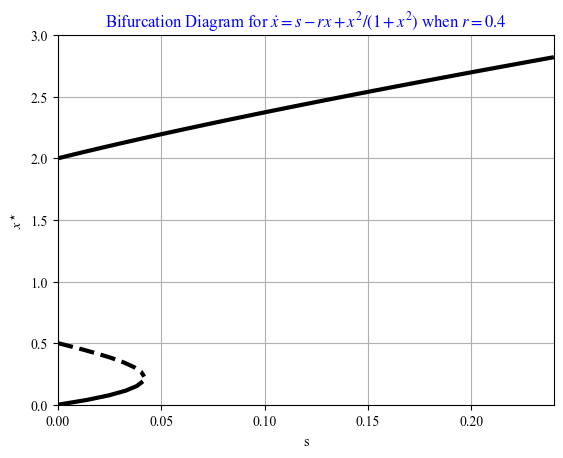

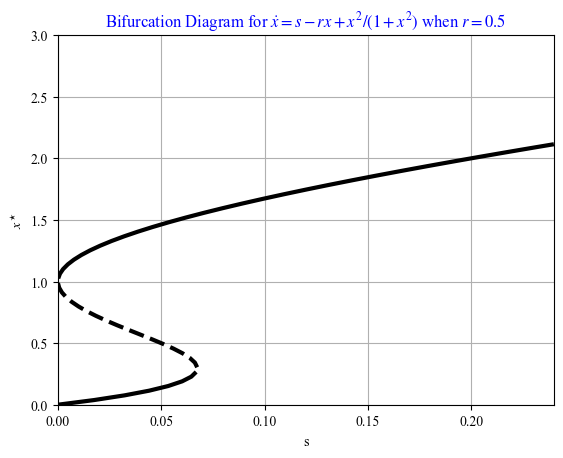

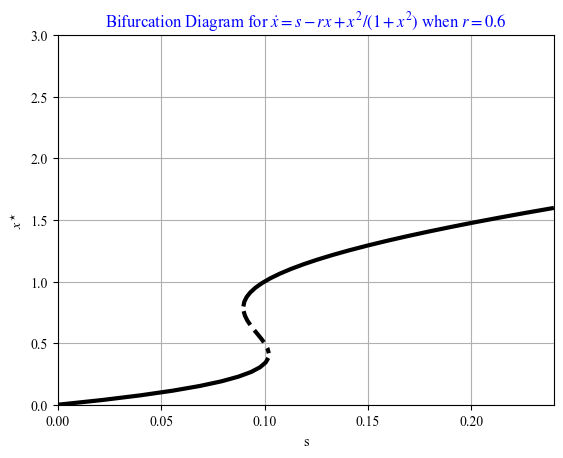

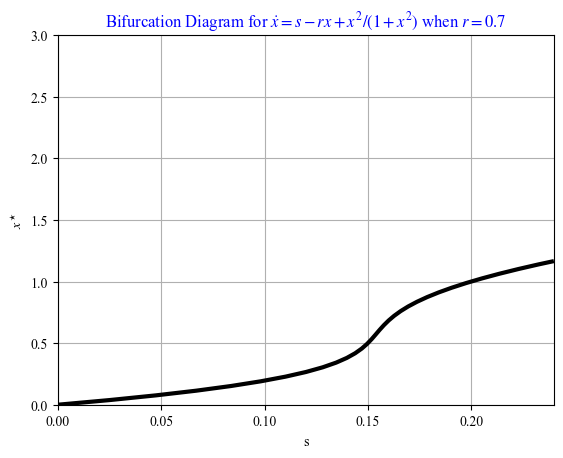

In [11]:
for r in [0.4,0.5,0.6,0.7]:
    f = lambda x,s: s -r*x + (x**2)/(1+x**2)
    ax = BF_diag(f, 0, 3, 0, 0.24, title="Bifurcation Diagram for $\dot{x} =s-rx+x^2/(1+x^2)$ "+f"when $r={r}$", x_lab="s")

If $s$ were to increase over time, then $g$, assuming that $g(0)=x(0)=0$, will start off relatively small. This is because for the bifurcation diagrams show, for each value of $r$ used, there were stable points close to where $x=0$ when $s$ is small. Overtime as $s$ increases, for sufficiently small values of $r$, such as 0.6, the stable node then becomes a much larger value of $x$. For example, when $r=0.5$, when $s\approx 0.65$, the stable node chanes from being at $x^*\approx 0.4$ to being at $x^*\approx 1.55$. For suffiently large values of $r$, such as 0.7, there is no discontinuity in the changing fixed point when $s$ increases, so $g$ will continuosly increase with $s$. Their relationship will look like a cube root function, with the center of the function being at an intermediate $s$ value.

After increasing, if $s$ decreases back to zero, for sufficiently large $r$ values, such as 0.6, the only fixed point when $s$ = 0 is a stable fixed point when $x=0$ this indicates that $g$ will decrease to zero when $s$ decreases to zero. For small values of $r$, such as $0.5$, there are two stable fixed points when $s=0$. In this case, if $x$ reaches a value higher than $x^*$ when $s=0$ and $x^*\neq0$ before $s$ starts to decrease, $x$ will not decrease to zero, but rather go to a higher value. This means that $g$ will not go back to zero when $s$ starts to decrease so long as it is sufficiently high. Realistically, this can be intrepreted as the gene G not turning off if a high enough concentration was reached before removing the signal S.

NOTE: got here in around 2 1/2 hours

#### Part (e)

System of Equations:<br>
$\frac{dx}{d\tau}(x=x_c)=s-rx_c+\frac{x_c^2}{1+x_c^2}=0$<br>
$\frac{d}{dx}\frac{dx}{d\tau}(x=x_c)=-r+\frac{2x_c}{(1+x_c^2)^2}=0$<br><br>
Finding the parametric equations for $s(x_c)$ and $r(x_c)$:<br>
$0=-r+\frac{2x_c}{(1+x_c^2)^2}\rightarrow r(x_c)=\frac{2x_c}{(1+x_c^2)^2}$<br>
$0=s-rx_c+\frac{x_c^2}{1+x_c^2} \rightarrow s=rx_c -\frac{x_c^2}{1+x_c^2} \rightarrow s(x_c)= \frac{2x_c^2}{(1+x_c^2)^2} - \frac{x_c^2}{1+x_c^2}$


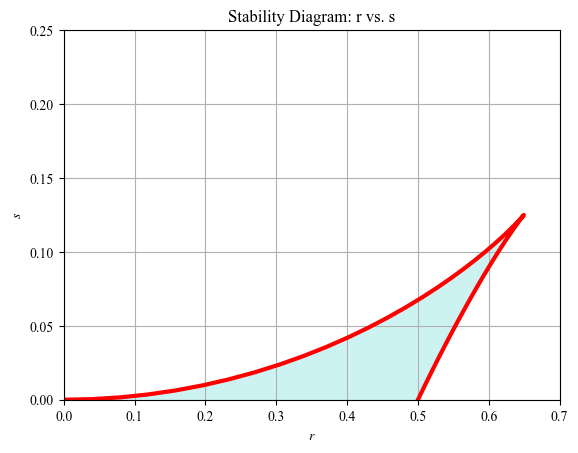

In [12]:
# determine (r,s) for the critical points 
xx = np.linspace(0,10,500)
r_c = 2*xx/(1+xx**2)**2
s_c = (xx**2-xx**4)/((1+xx**2)**2)

fig, ax=plt.subplots()
ax.plot(r_c,s_c,color='r',linewidth=3)
ax.fill(r_c,s_c,color='c',alpha=0.2)
ax.grid()
ax.set_xlim(0,0.7)
ax.set_ylim(0,0.25)
ax.set_xlabel('$r$')
ax.set_ylabel('$s$')
ax.set_title("Stability Diagram: r vs. s")
plt.show()

In the shaded blue region, that is where systems have shown to an unstable fixed point and two stable fixed points, one higher and one lower than the unstable fixed point. Outside the shaded blue region, systems have shown to only have one stable fixed point. This can be the relationship the diagram is generalizing. In terms of the problem, this can represent how $r$ and $s$ affect the production of Gene g. If the substance S is in a high enough concentration (represented by a high $s$ value), then the production of Gene g will go a stable amount. That value could be zero, but it is still going to a stable amount. If the substance S is not at a high enough concentration (represented by being in the blue region), then the rate at which Gene g is produced will not be smooth; it will reach a point of resistance when it reaches the unstable node, where either more of S has to be added or the the system will tend back towards a lower concentration of Gene g. $r$ represents the resistance to production. In this context, the blue region represents where the concentration of S is not enough to negate degredation. Above the region, there is enough S to negate degredation; below the region, degredation is happening quick enough to prevent production. This can be represented if the fixed point is $x^*=0$.

NOTE: about 3 1/2 hours to complete the exam